# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
%matplotlib inline
plt.style.use('seaborn')

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [3]:
df = pd.read_csv(r'data\bank_fin.zip', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
df[df.columns[df.isnull().sum() > 0]].isnull().sum()

balance    25
dtype: int64

### Задание 2

In [5]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

### Задание 3

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [4]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance'] = df['balance'].apply(lambda x: x.strip().replace(' ', '').replace(',00$', '').replace('$', '') if type(x) != np.float else x).astype('float')


In [8]:
round(df['balance'].mean(), 3)

1529.129

### Задание 4

In [5]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код
df['balance'] = df['balance'].fillna(df['balance'].median())
# df.loc[df['balance'].isnull(), 'balance'] = df['balance'].median()
round(df['balance'].mean(), 3)

1526.936

### Задание 5

In [6]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
popular_job = df['job'].mode()[0]
popular_education = df['education'].mode()[0]
df.loc[df['job'] == 'unknown', 'job'] = popular_job
df.loc[df['education'] == 'unknown', 'education'] = popular_education

mask1 = df['job'] == popular_job
mask2 = df['education'] == popular_education
round(df[mask1 & mask2]['balance'].mean(), 3)

1598.883

### Задание 6

In [7]:
# удалите все выбросы для признака balance
# ваш код
def iqr(data, feature):
    df = data[feature]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = (q3 - q1)
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    out = data[(df < lower) | (df > upper)]
    clear = data[(df >= lower) & (df <= upper)]
    return upper, clear

out, df_clear = iqr(df, 'balance')
df_clear.shape

(10105, 17)

In [12]:
out

4063.0

In [8]:
df_clear['balance'].describe()

count    10105.000000
mean       807.653538
std        994.151966
min      -2049.000000
25%         95.000000
50%        445.000000
75%       1227.000000
max       4063.000000
Name: balance, dtype: float64

## Часть 2:  Разведывательный анализ

### Задание 1

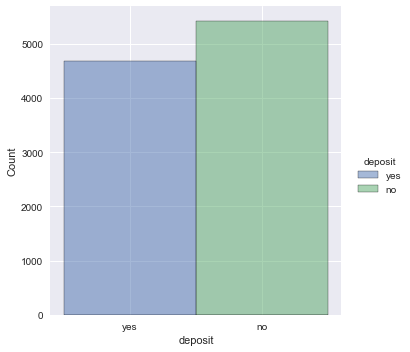

In [14]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
fg = sns.displot(data=df_clear, x='deposit', hue='deposit')


Данные сбалансированы

### Задания 2 и 3

In [70]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код

# columns = list(df_clear.describe().columns)
# n = len(columns)
# fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(15, 20))

# for i, column in enumerate(columns):
#     hist = sns.histplot(df_clear[column], ax=axes[i][0])
#     hist.set_title(f"{column} hist")
    
#     reg = sns.boxplot(data=df_clear, x=column, ax=axes[i][1])
#     reg.set_title(f"{column} box")
# plt.tight_layout()

df_clear.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000,10084.000000
mean,40.901726,809.587069,15.585879,368.926121,2.515569,51.376140,0.817136
std,11.741909,997.223584,8.437886,346.702597,2.706558,109.720365,2.245712
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,94.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,443.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1228.000000,22.000000,491.000000,3.000000,2.000000,1.000000
max,95.000000,4079.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


Есть большие значения в признаке возраст, 

### Задания 4 и 5

In [118]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты
df_clear.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10084,10084,10084,10084,10084,10084,10084,10084,10084,10084
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2310,5701,5507,9920,5238,8693,7271,2607,7553,5404


### Задание 6

In [138]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код
df_clear.groupby('poutcome')['deposit'].value_counts()

poutcome  deposit
failure   no          562
          yes         546
other     yes         264
          no          216
success   yes         859
          no           84
unknown   no         4542
          yes        3011
Name: deposit, dtype: int64

### Задание 7

In [146]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код
df_clear[df_clear['deposit'] == 'no'].groupby('month')['deposit'].count().sort_values()

month
dec       9
mar      24
sep      46
oct      61
jan     194
apr     317
feb     322
nov     452
jun     606
aug     772
jul     834
may    1767
Name: deposit, dtype: int64

### Задание 8

In [9]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
def age_group(age):
    if age < 30:
        return '<30'
    elif age < 40:
        return '30-40'
    elif age < 50:
        return '40-50'
    elif age < 60:
        return '50-60'
    return '60+'
df_clear['age_group'] = df_clear['age'].apply(age_group)

<AxesSubplot: xlabel='age_group', ylabel='Count'>

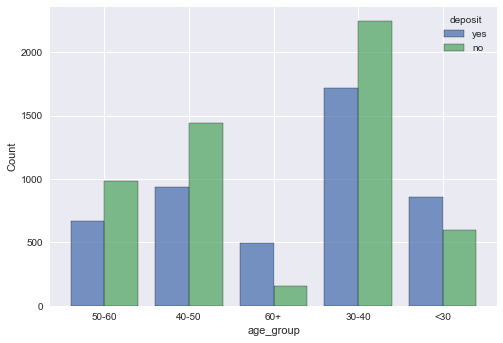

In [16]:
sns.histplot(data=df_clear, x='age_group', hue='deposit', multiple='dodge', shrink=.8)

### Задания 9 и 10

<AxesSubplot: xlabel='marital', ylabel='Count'>

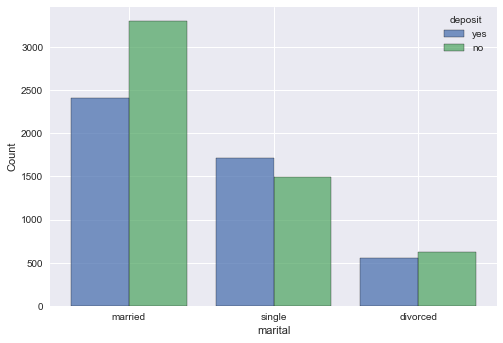

In [17]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
sns.histplot(data=df_clear, x='marital', hue='deposit', multiple='dodge', shrink=.8)

<AxesSubplot: xlabel='education', ylabel='Count'>

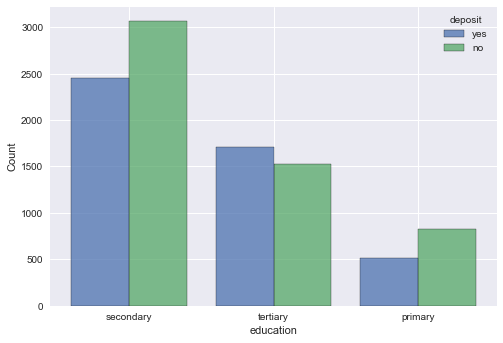

In [18]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
sns.histplot(data=df_clear, x='education', hue='deposit', multiple='dodge', shrink=.8)

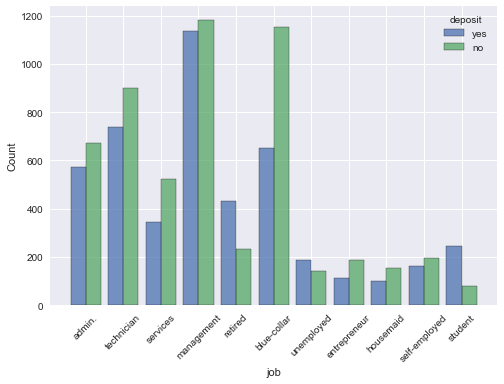

In [19]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
sns.histplot(data=df_clear, x='job', hue='deposit', multiple='dodge', shrink=.8).xaxis.set_tick_params(rotation=45)

### Задание 11

<AxesSubplot: xlabel='education', ylabel='marital'>

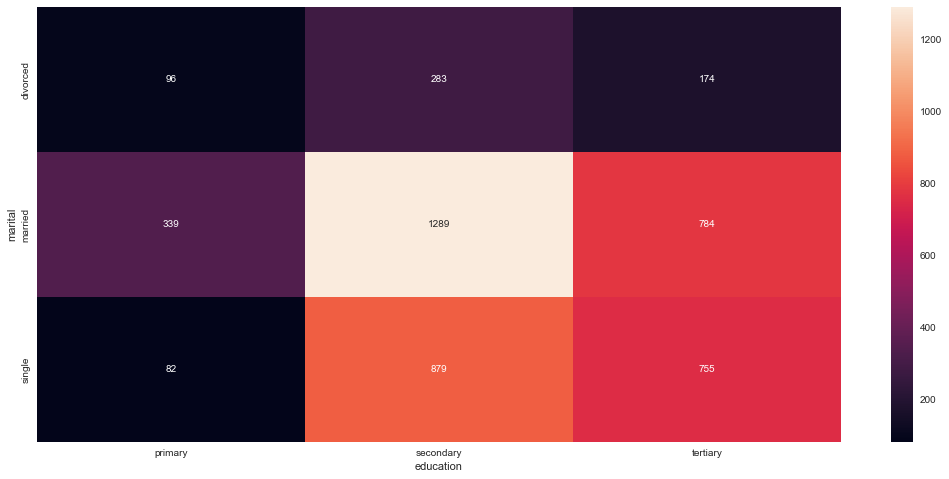

In [20]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
pivot = df_clear[df_clear['deposit'] == 'yes'].pivot_table(
    values='deposit',
    index='marital',
    columns=['education'],
    aggfunc='count'
)
#pivot.columns = ['_'.join(col) for col in pivot.columns.values]
fig = plt.figure(figsize=(18,8))
sns.heatmap(pivot, annot=True, fmt='.0f')

<AxesSubplot: xlabel='education', ylabel='marital'>

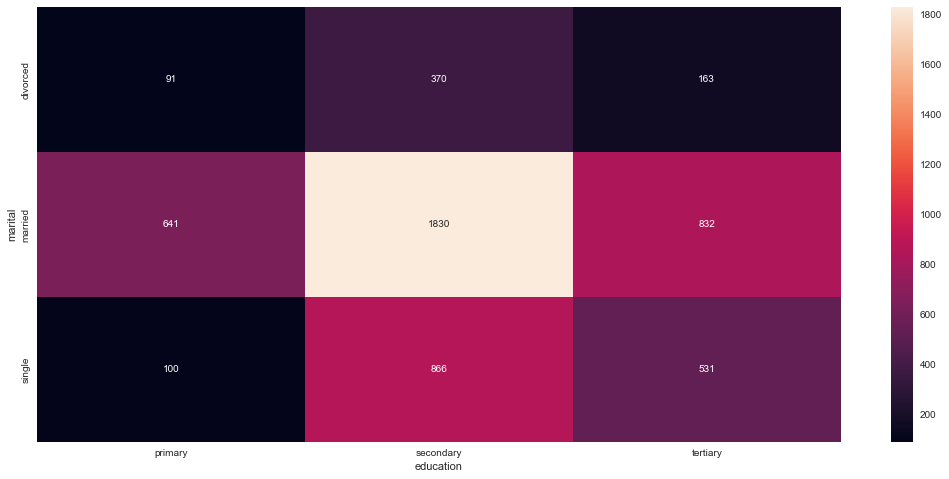

In [48]:
pivot = df_clear[df_clear['deposit'] == 'no'].pivot_table(
    values='deposit',
    index='marital',
    columns=['education'],
    aggfunc='count'
)
#pivot.columns = ['_'.join(col) for col in pivot.columns.values]
fig = plt.figure(figsize=(18,8))
sns.heatmap(pivot, annot=True, fmt='.0f')

## Часть 3: преобразование данных

### Задание 1

In [10]:
# преобразуйте уровни образования
lcoder = LabelEncoder()
df_clear['education'] = lcoder.fit_transform(df_clear['education'])
df_clear['education'].sum()

11995

In [11]:
lcoder_age = LabelEncoder()
df_clear['age_group'] = lcoder_age.fit_transform(df_clear['age_group'])

### Задания 2 и 3

In [12]:
# преобразуйте бинарные переменные в представление из нулей и единиц
binary_columns = ['deposit', 'default', 'housing', 'loan']
for col in binary_columns:
    df_clear[col] = df_clear[col].apply(lambda x: 1 if x == 'yes' else 0)

In [13]:
print(f"Std deposit: {df_clear['deposit'].std():.3f}")
sum_mean = 0
for col in ['default', 'housing', 'loan']:
    sum_mean += df_clear[col].mean()
print(f"summ_mean : {sum_mean:.3f}")

Std deposit: 0.499
summ_mean : 0.635


### Задание 4

In [14]:
# создайте дамми-переменные
t = df_clear.copy()
t = pd.get_dummies(t[['job','marital','contact','month','poutcome']])
t2 = pd.concat([df_clear, t], axis=1)
t2.shape

(10105, 51)

In [256]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10105 non-null  int64  
 1   job                10105 non-null  object 
 2   marital            10105 non-null  object 
 3   education          10105 non-null  int32  
 4   default            10105 non-null  int64  
 5   balance            10105 non-null  float64
 6   housing            10105 non-null  int64  
 7   loan               10105 non-null  int64  
 8   contact            10105 non-null  object 
 9   day                10105 non-null  int64  
 10  month              10105 non-null  object 
 11  duration           10105 non-null  int64  
 12  campaign           10105 non-null  int64  
 13  pdays              10105 non-null  int64  
 14  previous           10105 non-null  int64  
 15  poutcome           10105 non-null  object 
 16  deposit            101

### Задания 5 и 6

In [26]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
t2[t2.describe().columns].corr()['deposit'].sort_values(ascending=False).head()

deposit             1.000000
duration            0.457818
poutcome_success    0.288491
contact_cellular    0.223944
pdays               0.147917
Name: deposit, dtype: float64

Text(0, 0.5, 'Коэффициент корреляции')

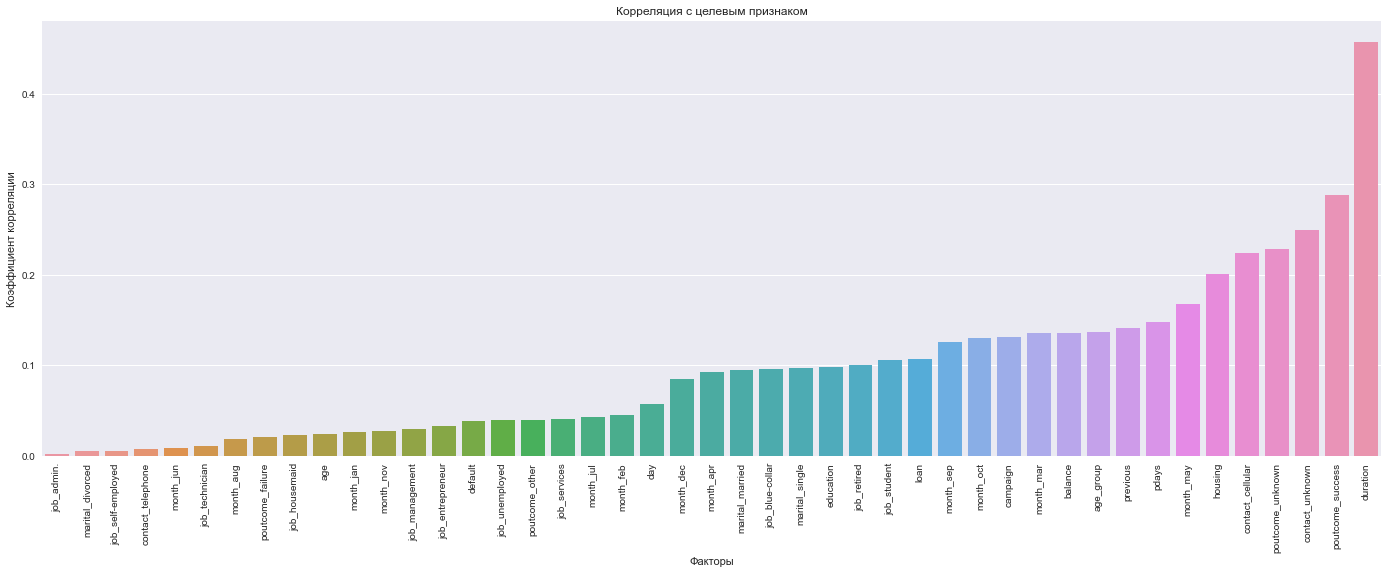

In [59]:
corr_with_target = t2.corr()['deposit'].abs().sort_values()
corr_with_target = corr_with_target.drop('deposit')
fig, ax = plt.subplots(figsize=(24,8))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Корреляция с целевым признаком')
ax.set_xlabel('Факторы')
ax.set_ylabel('Коэффициент корреляции');

In [27]:
# Есть ли среди признаков мультиколлинеарность? Будем считать достаточно сильной корреляцию не менее 0.9.
(t2[t2.describe().columns].corr().values >= 0.9).sum() == t2[t2.describe().columns].shape[1]

True

### Задания 7 и 8

In [28]:
df = t2[t2.describe().columns]
X = df.drop('deposit', axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [29]:
# рассчитайте необходимые показатели
print(round(y_test.mean(), 2))
X_test.shape

0.46


(3335, 45)

### Задание 9

In [30]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
select_kb = SelectKBest(k=15)
select_kb.fit(X_train, y_train)
k_best_columns = select_kb.get_feature_names_out()
X_train = X_train[k_best_columns]
X_test = X_test[k_best_columns]

### Задание 10

In [31]:
# нормализуйте данные с помощью minmaxsxaler
min_scaler = preprocessing.MinMaxScaler()
min_scaler.fit(X_train)

X_train = pd.DataFrame(min_scaler.transform(X_train), columns=k_best_columns)
X_test = pd.DataFrame(min_scaler.transform(X_test), columns=k_best_columns)

In [32]:
round(X_test.iloc[:,0].mean(), 2)

0.47

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [34]:
# обучите логистическую регрессию и рассчитайте метрики качества
lr = linear_model.LogisticRegression(solver='sag', random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
print(f"accuracy: {metrics.accuracy_score(y_test, test_pred):.2f}")

accuracy: 0.80


### Задания 2,3,4

In [35]:
# обучите решающие деревья, настройте максимальную глубину
dt = tree.DecisionTreeClassifier(criterion='entropy', random_state=42,)
dt.fit(X_train, y_train)
train_pred = dt.predict(X_train)
test_pred = dt.predict(X_test)
print(f"accuracy train: {metrics.accuracy_score(y_train, train_pred):.2f}")
print(f"accuracy test: {metrics.accuracy_score(y_test, test_pred):.2f}")

accuracy train: 1.00
accuracy test: 0.75


In [36]:
max_depths = list(range(1,11))
accuracy_train = []
accuracy_test = []
delta_acc = []
for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=max_depth)
    dt.fit(X_train, y_train)
    acc_train = metrics.accuracy_score(y_train, dt.predict(X_train)).round(3)
    acc_test = metrics.accuracy_score(y_test, dt.predict(X_test)).round(3)
    delta = acc_train - acc_test
    accuracy_train.append(acc_train)
    accuracy_test.append(acc_test)
    delta_acc.append(delta)

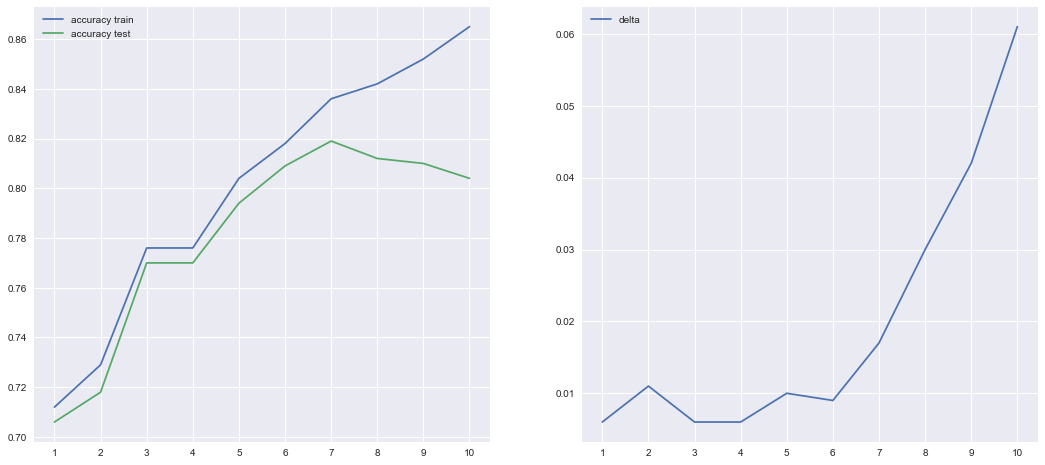

In [37]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax[0].plot(max_depths, accuracy_train, label='accuracy train')
ax[0].plot(max_depths, accuracy_test, label='accuracy test')
ax[1].plot(max_depths, delta_acc, label='delta')
ax[0].set_xticks(max_depths)
ax[1].set_xticks(max_depths)  
ax[0].legend()
ax[1].legend();

На правом графике видно что разница в значениях метрик между тестовой и обучаемой выборками после глубины 6 резко пошла вверх, следовательно оптималная глубина дерева max_depth=6

In [38]:
dt = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=6)
dt.fit(X_train, y_train)
train_pred = dt.predict(X_train)
test_pred = dt.predict(X_test)
print(f"accuracy train: {metrics.accuracy_score(y_train, train_pred):.2f}")
print(f"accuracy test: {metrics.accuracy_score(y_test, test_pred):.2f}")

accuracy train: 0.82
accuracy test: 0.81


In [39]:
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1790
           1       0.77      0.84      0.80      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.81      0.81      0.81      3335



### Задание 5

In [43]:
# подберите оптимальные параметры с помощью gridsearch
from sklearn.model_selection import GridSearchCV
param_grid = {
    'min_samples_split': [2, 5, 7, 10],
    'max_depth':[3,5,7]
}
g_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    n_jobs=-1
)


%time
g_search.fit(X_train, y_train)
print(f"F1 train: {metrics.f1_score(y_train, g_search.predict(X_train)):.2f}")
print(f"F1 test: {metrics.f1_score(y_test, g_search.predict(X_test)):.2f}")

CPU times: total: 0 ns
Wall time: 0 ns
F1 train: 0.82
F1 test: 0.80


In [44]:
g_search.best_params_

{'max_depth': 7, 'min_samples_split': 2}

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [45]:
# обучите на ваших данных случайный лес
rf = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)
print(metrics.classification_report(y_train, rf.predict(X_train)))
print(metrics.classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3634
           1       0.84      0.86      0.85      3136

    accuracy                           0.86      6770
   macro avg       0.86      0.86      0.86      6770
weighted avg       0.86      0.86      0.86      6770

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



In [47]:
print(metrics.f1_score(y_test, rf.predict(X_test)).round(3))

0.819


### Задания 2 и 3

In [48]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
gb = ensemble.GradientBoostingClassifier(
    learning_rate = 0.05,
    n_estimators = 300,
    min_samples_leaf = 5,
    max_depth = 5,
    random_state = 42
)
gb.fit(X_train, y_train)
print(metrics.classification_report(y_test, gb.predict(X_test)))


              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



In [49]:
print(metrics.f1_score(y_test, gb.predict(X_test)).round(3))

0.817


### Задание 4

In [111]:
# объедините уже известные вам алгоритмы с помощью стекинга 
estimators = [
    ('dt', tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, random_state=42)),
    ('lr', linear_model.LogisticRegression(solver='sag', random_state=42, max_iter=1000)),
    ('gb', gb)
]
clf = ensemble.StackingClassifier(
    estimators=estimators,
    final_estimator=lr,
    n_jobs=-1
)
clf.fit(X_train, y_train);

In [160]:
print(metrics.classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1790
           1       0.81      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



### Задание 5

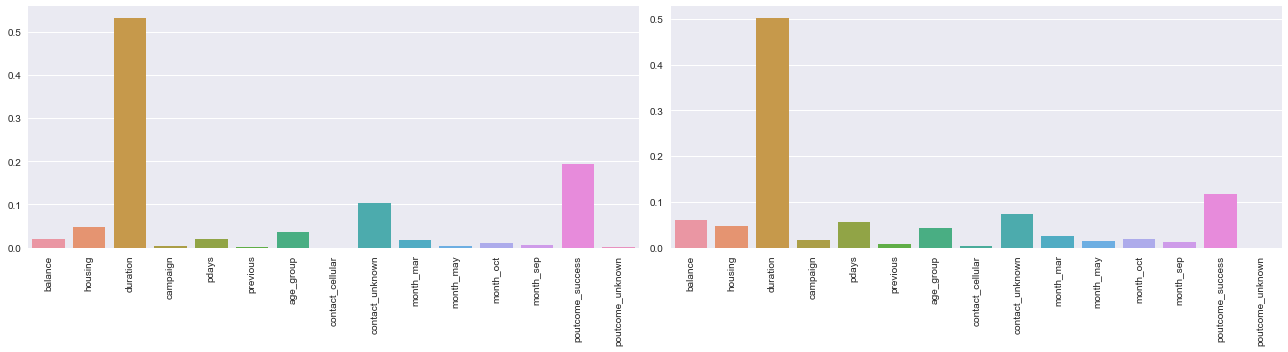

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))
columns = clf.estimators_[2].feature_names_in_
feature_importances = clf.estimators_[2].feature_importances_
sns.barplot(x=clf.estimators_[0].feature_names_in_, y=clf.estimators_[0].feature_importances_, ax=ax[0]).xaxis.set_tick_params(rotation=90)
sns.barplot(x=clf.estimators_[2].feature_names_in_, y=clf.estimators_[2].feature_importances_, ax=ax[1]).xaxis.set_tick_params(rotation=90)
plt.tight_layout();



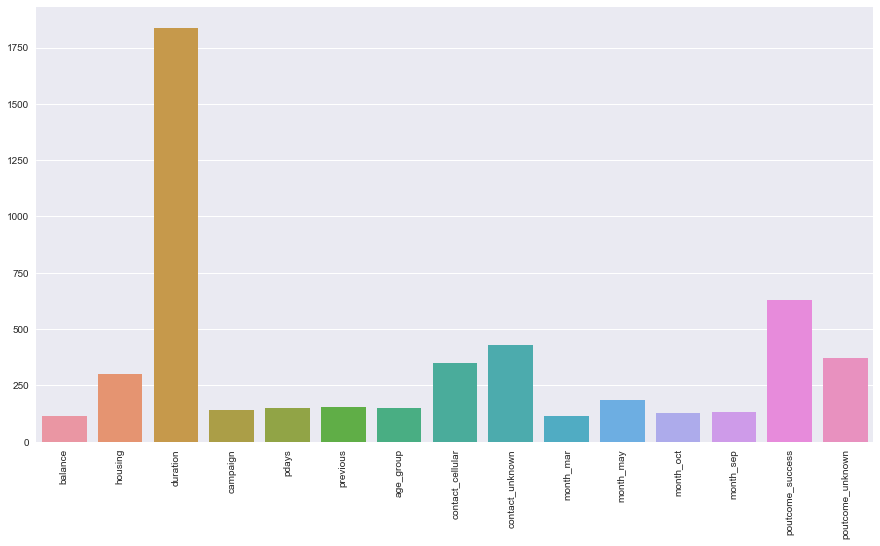

In [144]:
selector = SelectKBest(f_classif, k=3)
selector.fit(X_train, y_train)
 
fig, ax = plt.subplots(figsize=(15,8))
columns = X_train.columns
features = selector.scores_
sns.barplot(x=columns, y=features).xaxis.set_tick_params(rotation=90)


### Задания 6,7,8

In [3]:
import optuna

In [157]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna

def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train))

  return score



In [158]:
%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-03-22 17:11:49,056] A new study created in memory with name: RandomForestClassifier


CPU times: total: 0 ns
Wall time: 0 ns


[I 2023-03-22 17:11:50,350] Trial 0 finished with value: 0.8562480425931726 and parameters: {'n_estimators': 178, 'max_depth': 13, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8562480425931726.
[I 2023-03-22 17:11:51,366] Trial 1 finished with value: 0.8521547656495754 and parameters: {'n_estimators': 168, 'max_depth': 11, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8562480425931726.
[I 2023-03-22 17:11:52,521] Trial 2 finished with value: 0.8587923232953658 and parameters: {'n_estimators': 171, 'max_depth': 15, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.8587923232953658.
[I 2023-03-22 17:11:53,641] Trial 3 finished with value: 0.8936502971535816 and parameters: {'n_estimators': 150, 'max_depth': 30, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.8936502971535816.
[I 2023-03-22 17:11:55,027] Trial 4 finished with value: 0.8946956657800033 and parameters: {'n_estimators': 177, 'max_depth': 28, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.894

In [159]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.82
f1_score на тестовом наборе: 0.82


In [161]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1790
           1       0.79      0.84      0.82      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.83      0.82      3335
weighted avg       0.83      0.82      0.82      3335

